# Understanding the eGFR dataset

### Importing libraries

In [1]:
# Numpy
import numpy as np
from numpy import concatenate, array
from numpy.random import randn
# Decimal precision value to display in the matrix
np.set_printoptions(precision=5, suppress=True)

# Scipy
import scipy
import scipy.stats as stats

# Matplotlib
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
%matplotlib inline
#mpl.rc('figure', figsize=(10, 8))

# DBscan from sklearn
from sklearn import cluster, datasets
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import time
print 'All libraries loaded.'

All libraries loaded.


## Load datasets

In [4]:
# Loads the data from the given file into numpy arrays
def load_egfr_dataset(filePath, delimiter=','):
    egfr = np.loadtxt(filePath, delimiter=delimiter, dtype=float, skiprows=1, unpack=True, usecols=(6,))
    person_ids, birthyear, age = np.loadtxt(filePath, delimiter=delimiter, dtype=int, skiprows=1, unpack=True, usecols=(0,3,4))
    timestamp, gender = np.loadtxt(filePath, delimiter=delimiter, dtype=str, skiprows=1, unpack=True, usecols=(1,2))
    
    return person_ids, egfr, timestamp, birthyear, age, gender


# Get the datasets
person_ids, egfr, timestamp, birthyear, age, gender = load_egfr_dataset('dataset/cdr_gfr_derived.csv')
# print person_ids, egfr, timestamp, birthyear, age, gender

On an average a patient has 7.37337657202 eGFR counts


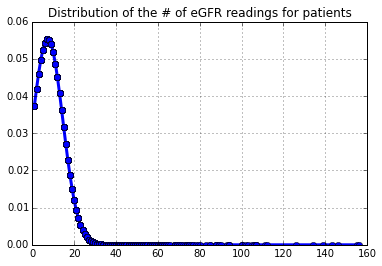

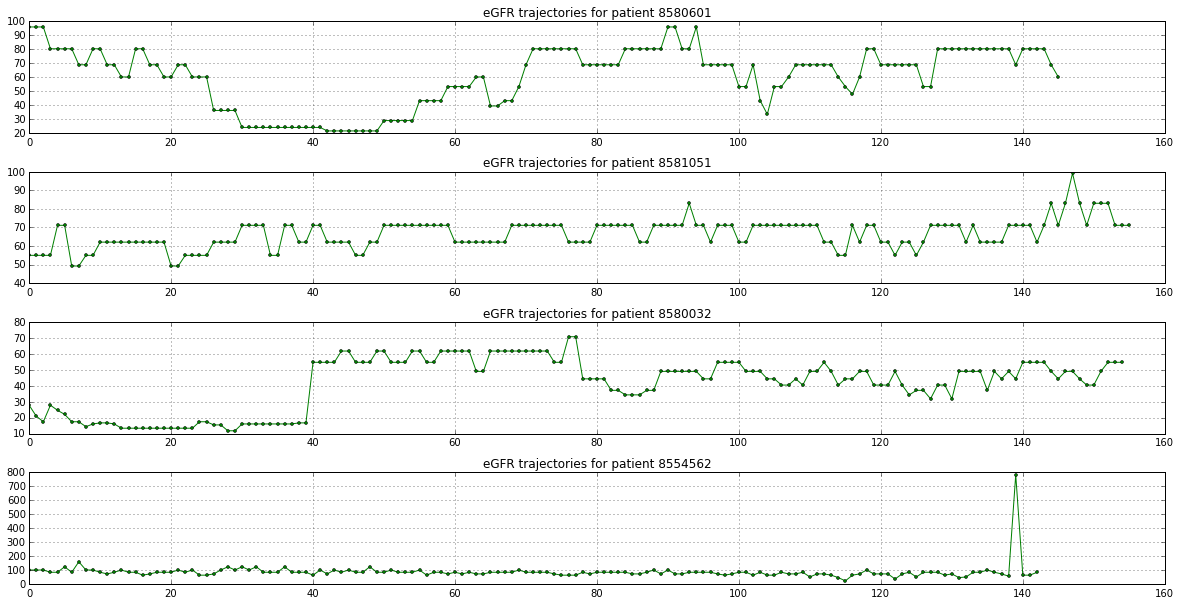

In [89]:
def analyze_patient_records(person_ids, egfr_values, timestamp):
    
    # Try with a smaller subset
#     person_ids = np.array(person_ids[0:20])
#     egfr_values = np.array(egfr_values[0:20])
    
#     print 'Originally, person_ids', person_ids
#     print 'Originally, egfr_values', egfr_values
#     print 'Rows:', person_ids.shape[0]
    
    unique_patients, unique_index, egfr_counts = np.unique(person_ids, return_counts=True, return_index=True)
    
    k = 4
    top_k_egfr = np.argpartition(egfr_counts, -k)[-k:]
    top_k_patients = unique_patients[top_k_egfr]
    
    print 'On an average a patient has', np.average(egfr_counts), 'eGFR counts'
    
    # Plot distribution of the # of eGFR readings for patients
    egfr_counts.sort()
    pdf = stats.norm.pdf(egfr_counts, np.mean(egfr_counts), np.std(egfr_counts))  #this is a fitting indeed
    pyplot.plot(egfr_counts, pdf, '-o', linewidth=3)
    pyplot.grid()
    pyplot.title('Distribution of the # of eGFR readings for patients')
    pyplot.show()
    
    topk_egfr_values = []
    topk_timestamps = []
    for i in range(k):
        this_patients_id = top_k_patients[i]
        this_patients_egfr_values = egfr_values[np.where(person_ids == this_patients_id)]
        this_patients_timestamps_values = timestamp[np.where(person_ids == this_patients_id)]
        topk_egfr_values.append(this_patients_egfr_values)
        topk_timestamps.append(this_patients_timestamps_values)
    
    
    # Top k patients = top_k_patients
    # eGFR values of the top k patients = topk_egfr_values
    # Timestamp values of the top k patients = topk_timestamps
    
    # For now just plot eGFR values
    # Later, plot them vs timestamps
    # Will need to evenly distribute the timestamps
    figure = pyplot.figure()
    figure.set_size_inches(16.5, 8.5)
    for i in range(k):
        pyplot.subplot(4,1,i)
        pyplot.plot(topk_egfr_values[i], '-o', linewidth=1, markersize=3, color='g')
        pyplot.grid()
        pyplot.title('eGFR trajectories for patient ' + str(top_k_patients[i]))
    pyplot.tight_layout()
    pyplot.show()
    

analyze_patient_records(person_ids, egfr, timestamp)